In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('qol_states_2024.csv')

df.head()

,state,QualityOfLifeTotalScore,QualityOfLifeQualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,QualityOfLifeSafety
0,Alabama,45.61,40,1,40,48,32
1,Alaska,40.93,50,42,22,30,45
2,Arizona,48.31,21,25,14,39,40
3,Arkansas,42.42,46,4,34,45,47
4,California,52.03,2,50,15,24,27


In [4]:
df.info

<bound method DataFrame.info of              state  QualityOfLifeTotalScore  QualityOfLifeQualityOfLife  \
0          Alabama                    45.61                          40   
1           Alaska                    40.93                          50   
2          Arizona                    48.31                          21   
3         Arkansas                    42.42                          46   
4       California                    52.03                           2   
5         Colorado                    53.37                          12   
6      Connecticut                    52.21                          24   
7         Delaware                    52.33                          48   
8          Florida                    58.07                           5   
9          Georgia                    50.76                          18   
10          Hawaii                    47.46                          43   
11           Idaho                    58.73                          22   
12        Illinois                    55.47                           4   
13         Indiana                    49.40                          33   
14            Iowa                    55.37                          17   
15          Kansas                    52.47                          27   
16        Kentucky                    46.39                          47   
17       Louisiana                    41.74                          37   
18           Maine                    57.55                          25   
19        Maryland                    54.40                          31   
20   Massachusetts                    62.65                           6   
21        Michigan                    50.87                          14   
22       Minnesota                    57.99                           8   
23     Mississippi                    39.77                          49   
24        Missouri                    48.79                          23   
25         Montana                    53.75                          28   
26        Nebraska                    53.08                          32   
27          Nevada                    47.58                          19   
28   New Hampshire                    58.25                          36   
29      New Jersey                    62.01                           7   
30      New Mexico                    42.51                          30   
31        New York                    60.64                           1   
32  North Carolina                    51.51                          16   
33    North Dakota                    54.17                          38   
34            Ohio                    49.32                          15   
35        Oklahoma                    43.82                          35   
36          Oregon                    48.97                          13   
37    Pennsylvania                    56.42                           3   
38    Rhode Island                    51.65                          44   
39  South Carolina                    43.80                          26   
40    South Dakota                    53.13                          41   
41       Tennessee                    48.85                          34   
42           Texas                    49.00                          11   
43            Utah                    56.84                          29   
44         Vermont                    57.52                          42   
45        Virginia                    58.73                          20   
46      Washington                    52.11                           9   
47   West Virginia                    46.84                          45   
48       Wisconsin                    57.92                          10   
49         Wyoming                    58.00                          39   

    QualityOfLifeAffordability  QualityOfLifeEconomy  \
0                            1                    40   
1                           42

In [5]:
df.describe()

,QualityOfLifeTotalScore,QualityOfLifeQualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,QualityOfLifeSafety
count,50.000000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,51.830200,25.50000,25.50000,25.50000,25.50000,25.50000
std,5.728049,14.57738,14.57738,14.57738,14.57738,14.57738
min,39.770000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,48.430000,13.25000,13.25000,13.25000,13.25000,13.25000
50%,52.160000,25.50000,25.50000,25.50000,25.50000,25.50000
75%,56.735000,37.75000,37.75000,37.75000,37.75000,37.75000
max,62.650000,50.00000,50.00000,50.00000,50.00000,50.00000


In [7]:
pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.2 MB/s eta 0:00:00


In [ ]:
pip install spell-checker


In [9]:
from tqdm.notebook import tqdm

In [10]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [12]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
languages = stopwords.fileids()
stop_words = stopwords.words(languages[0])

In [35]:
pip install langdetect

In [36]:
from tqdm import tqdm

In [37]:
import nltk

In [38]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['state'] = df['QualityOfLifeTotalScore'].apply(detect_language)

In [19]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [39]:
pip install pysia

df['sentiment'] = [sia.QualityOfLifeQualityOfLife(x)['compound'] for x in tqdm(df['state'])]
df['QualityOfLifeTotalScore'] = df['sentiment'].apply(label_sentiment);
df['sentiment'] = [sia.QualityOfLifeQualityOfLife(x)['compound'] for x in tqdm(df['state'])]
df['QualityOfLifeTotalScore'] = df['sentiment'].apply(label_sentiment);


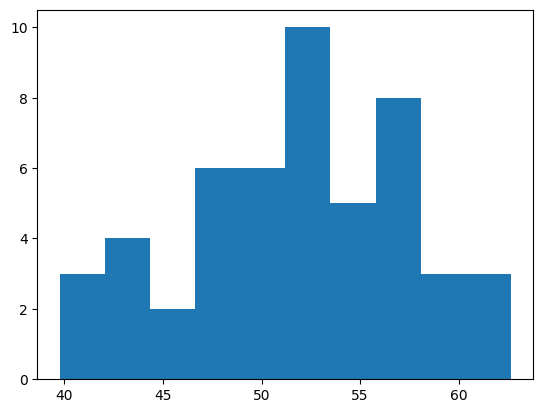

<Figure size 5000x5000 with 0 Axes>

In [44]:
df['QualityOfLifeTotalScore'].value_counts()
plt.hist(df['QualityOfLifeTotalScore'])
plt.figure(figsize=(50,50))
plt.show()